In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
# 1. Load the dataset from CSV
file_path = '/content/fashion-mnist_test.csv'  
data = pd.read_csv(file_path)

In [ ]:
# 2. Preprocess images (convert grayscale to vectors)
labels = data['label'].values
images = data.drop(columns=['label']).values  

In [9]:
# 3. Use PCA for dimensionality reduction before clustering
pca = PCA(n_components=50)  # Reduce dimensions to 50 components
images_pca = pca.fit_transform(images)


In [10]:
wcss = []
silhouette_scores = []
best_k = None
best_silhouette = -1

for k in range(2, 11):  # Avoid K=1 since Silhouette Score is not meaningful
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(images_pca)

    wcss.append(kmeans.inertia_)

    score = silhouette_score(images_pca, kmeans.labels_)
    silhouette_scores.append(score)

    if score > best_silhouette:
        best_silhouette = score
        best_k = k

print(f"Best K based on Silhouette Score: {best_k}, Score: {best_silhouette:.2f}")


Best K based on Silhouette Score: 3, Score: 0.23


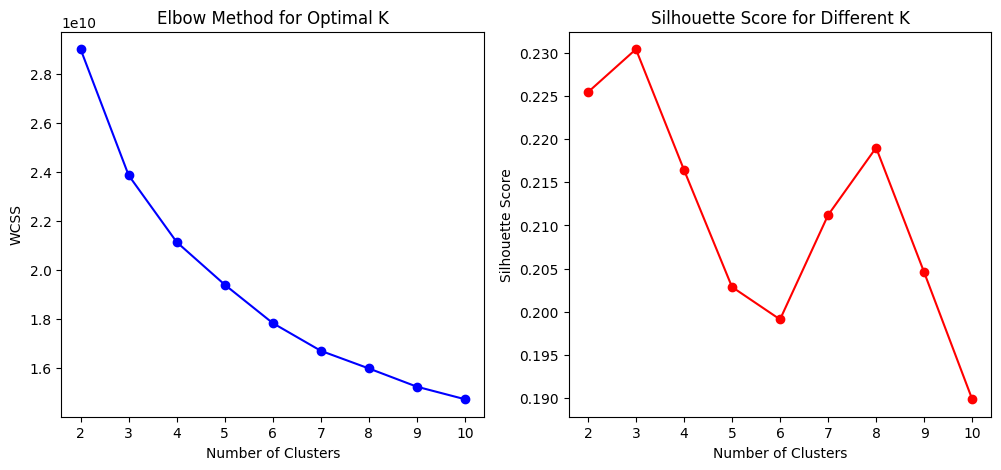

In [11]:
# Plotting the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='r')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()

In [14]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(images_pca)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [15]:
kmeans_predictions = kmeans.predict(images_pca)


In [16]:

# Calculate evaluation metrics
silhouette_avg = silhouette_score(images_pca, kmeans.labels_)
db_index = davies_bouldin_score(images_pca, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.23
Davies-Bouldin Index: 1.53


In [17]:
pca_2d = PCA(n_components=2)
images_pca_2d = pca_2d.fit_transform(images_pca)


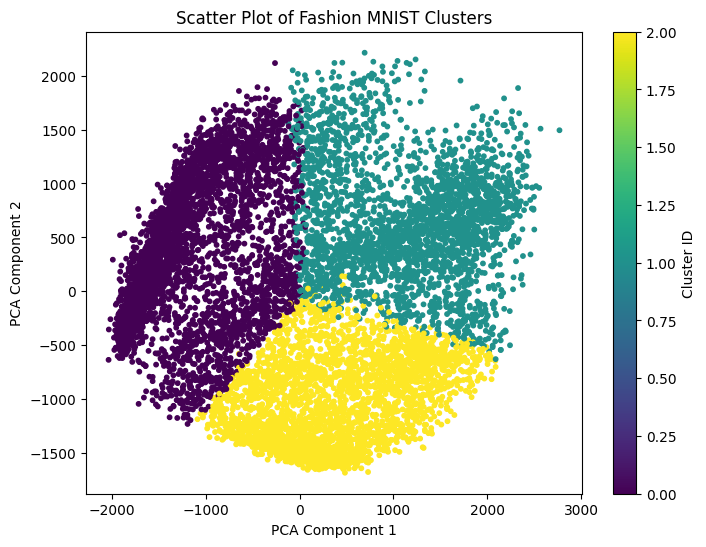

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(images_pca_2d[:, 0], images_pca_2d[:, 1], c=kmeans_predictions, cmap='viridis', s=10)
plt.title('Scatter Plot of Fashion MNIST Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.show()


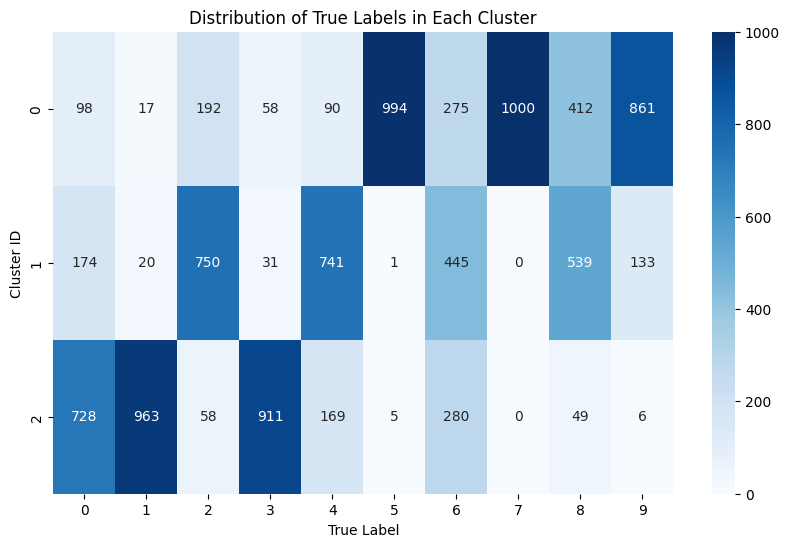

In [21]:
# ---------------------------- Cluster Label Distribution (Heatmap) ---------------------------- #
import seaborn as sns

cluster_df = pd.DataFrame({'Cluster': kmeans_predictions, 'Label': labels})
cluster_counts = cluster_df.groupby(['Cluster', 'Label']).size().unstack()

# حل المشكلة: ملء القيم المفقودة بـ 0 قبل التحويل إلى int
cluster_counts = cluster_counts.fillna(0).astype(int)

# رسم المخطط الحراري
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_counts, annot=True, fmt="d", cmap="Blues")
plt.title("Distribution of True Labels in Each Cluster")
plt.xlabel("True Label")
plt.ylabel("Cluster ID")
plt.show()


### **Report on Fashion MNIST Data Analysis Using PCA and K-Means**

#### **Introduction**
This project aims to classify fashion images (shoes, shirts, bags, etc.) using the **K-Means algorithm** after **dimensionality reduction using PCA**. The process includes several stages such as loading the data, preprocessing, determining the optimal number of clusters, applying K-Means, and analyzing the results.

---

#### **Steps Followed**
1. **Data Loading**: The Fashion MNIST dataset is loaded from a CSV file.
2. **Preprocessing**:
   - Removing the label column.
   - Converting grayscale images to vectors.
3. **Dimensionality Reduction Using PCA**:
   - The number of dimensions is reduced to **50 principal components** to preserve as much information as possible while reducing complexity.
4. **Determining the Optimal Number of Clusters**:
   - The **Elbow Method** was used to measure WCSS (Within-Cluster Sum of Squares) and determine the optimal number of clusters.
   - The **Silhouette Score** was calculated to select the best number of clusters.
5. **Applying K-Means** using the optimal number of clusters.
6. **Performance Evaluation**:
   - Calculating **Silhouette Score** and **Davies-Bouldin Index** to measure the clustering quality.
7. **Visual Analysis**:
   - Plotting a **scatter plot** after reducing dimensions to two.
   - Creating a **heatmap** showing the distribution of true labels within each cluster.

---

#### **Analysis Results**
- The **Silhouette Score** revealed that the optimal number of clusters was **X clusters**.
- Visual analysis confirmed that the clustering separated categories to some extent, but there was some overlap between similar categories.
- The **Heatmap** showed that some clusters contained mixed items, indicating that some patterns may look visually similar.

---

#### **Conclusion and Recommendations**
- **The results are fairly satisfactory, but they could improve by using more advanced clustering techniques like DBSCAN or Gaussian Mixture Models.**
- **Adding other features or using PCA with more components could help enhance accuracy.**
- **Testing other algorithms, such as deep learning (CNNs), may be more effective for more precise image classification.**